In [12]:
import pandas as pd
import sqlite3
import os

In [13]:
conn = sqlite3.connect('inventory.db')

In [14]:
os.chdir(r"C:\\Users\\JATIN KUMAR\\Downloads\\python analysis\\Vendor performance analysis\\data\\data")

In [15]:
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type = 'table'",conn)
tables

,name
0,vendor_invoice
1,begin_inventory
2,end_inventory
3,purchases
4,purchase_prices
5,sales
6,vendor_sales_summary


In [76]:
import sqlite3
import pandas as pd

# 1. Connect to your existing database
conn = sqlite3.connect('inventory.db')

# 2. Read your sales CSV but only take 24 lakh rows
sales = pd.read_csv(
    r"C:\Users\JATIN KUMAR\Downloads\python analysis\Vendor performance analysis\data\data\sales.csv",
    nrows=2400000  # limit rows while reading
)

# 3. Save 24 lakh rows into the 'sales' table
sales.to_sql("sales", conn, if_exists="replace", index=False)  
# 'replace' makes sure only sales table is replaced, other tables stay intact

# 4. Read vendor_invoice and add it too (if not already added)
vendor_invoice_df = pd.read_csv(
    r"C:\Users\JATIN KUMAR\Downloads\python analysis\Vendor performance analysis\data\data\vendor_invoice.csv"
)
vendor_invoice_df.to_sql("vendor_invoice", conn, if_exists="append", index=False)


5543

In [11]:
df.info('purchases')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [77]:
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type = 'table'",conn)
tables

,name
0,vendor_invoice
1,vendor_sales_summary
2,begin_inventory
3,end_inventory
4,purchases
5,purchase_prices
6,sales


In [12]:
df.shape

(5543, 10)

In [24]:
pd.read_sql("select count(*) from purchases", conn)      #count of records

,count(*)
0,2372474


In [78]:
for table in tables['name']:
    print('-'*50, f'{table}', '-'*50 )
    print('Count of records :', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0] )

-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records : 55430
-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records : 10692
-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records : 206529
-------------------------------------------------- end_inventory --------------------------------------------------
Count of records : 224489
-------------------------------------------------- purchases --------------------------------------------------
Count of records : 2372474
-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records : 12261
-------------------------------------------------- sales --------------------------------------------------
Count of records : 2400000


In [79]:
for table in tables['name']:
    print('-'*50, f'{table}', '-'*50 )
    print('Count of records :', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0] )
    display(pd.read_sql(f"select * from {table} limit 5", conn))

-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records : 55430


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records : 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,0,0,0,0,68601.68,-3811251.60,-inf,0.0,0.0
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,0,0,0,0,144929.24,-3804041.22,-inf,0.0,0.0
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,0,0,0,0,123780.22,-3418303.68,-inf,0.0,0.0
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,0,0,0,0,257032.07,-3261197.94,-inf,0.0,0.0
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,0,0,0,0,257032.07,-3023206.01,-inf,0.0,0.0


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records : 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records : 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records : 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records : 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records : 2400000


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [87]:
#working with one vendors say  4466

In [45]:
purchases =  pd.read_sql_query("select * from purchases where VendorNumber = 4466", conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [91]:
purchase_prices =  pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466", conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [92]:
vendor_invoice =  pd.read_sql_query("select * from vendor_invoice where VendorNumber = 4466", conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
...,...,...,...,...,...,...,...,...,...,...
105,4466,AMERICAN VINTAGE BEVERAGE,2024-12-06,13134,2024-11-20,2025-01-18,305,3018.89,15.70,None
106,4466,AMERICAN VINTAGE BEVERAGE,2024-12-16,13254,2024-11-28,2025-01-13,262,2530.36,11.39,None
107,4466,AMERICAN VINTAGE BEVERAGE,2024-12-26,13432,2024-12-09,2025-01-27,231,2263.43,11.32,None
108,4466,AMERICAN VINTAGE BEVERAGE,2024-12-30,13483,2024-12-13,2025-02-11,221,2178.27,11.33,None


In [96]:
#working with purchases and purchas_prices table

In [97]:
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [100]:
purchases.groupby(['Brand' , 'PurchasePrice'])[['Quantity' , 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [101]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [102]:
#vendor imvoice

In [103]:
vendor_invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None


In [106]:
vendor_invoice['PONumber'].unique()

array([ 8137,  8207,  8307,  8469,  8532,  8604,  8793,  8892,  8995,
        9033,  9180,  9244,  9371,  9491,  9583,  9639,  9800,  9886,
        9999, 10095, 10169, 10257, 10346, 10445, 10600, 10695, 10777,
       10836, 10969, 11085, 11187, 11244, 11362, 11489, 11540, 11716,
       11771, 11901, 11993, 12125, 12235, 12253, 12321, 12466, 12515,
       12702, 12752, 12828, 12929, 13092, 13134, 13254, 13432, 13483,
       13627], dtype=int64)

In [105]:
vendor_invoice.shape

(110, 10)

In [108]:
vendor_invoice['PONumber'].value_counts()

PONumber
8137     2
12253    2
11187    2
11244    2
11362    2
11489    2
11540    2
11716    2
11771    2
11901    2
11993    2
12125    2
12235    2
12321    2
10969    2
12466    2
12515    2
12702    2
12752    2
12828    2
12929    2
13092    2
13134    2
13254    2
13432    2
13483    2
11085    2
10836    2
8207     2
9491     2
8307     2
8469     2
8532     2
8604     2
8793     2
8892     2
8995     2
9033     2
9180     2
9244     2
9371     2
9583     2
10777    2
9639     2
9800     2
9886     2
9999     2
10095    2
10169    2
10257    2
10346    2
10445    2
10600    2
10695    2
13627    2
Name: count, dtype: int64

In [109]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [81]:
sales.groupby('Brand')[['SalesDollars' ,'SalesPrice' , 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
58,8547.42,6014.37,658
60,2589.56,1769.34,244
61,839.40,69.95,60
62,17991.42,14289.36,458
63,15841.15,12663.92,385
...,...,...,...
90085,258.93,73.98,7
90086,103.98,103.98,2
90087,939.98,939.98,2


In [121]:
#important points 

In [124]:
#purchase table contain actual purchase data including the data of puchase, product(brand) purchase by the vendors, the amount piad in (dollars) and quantity is purchased

In [123]:
#purchase prices column is derived from the purchase prices table which provides product wise actualand purchase prices. The combination of vendor and brand is unique int hsi table

In [126]:
#vendor_invoice table aggregaes data from the purchases table summarising the quantity and dollar amounts along with additional column for frieght. this table maintains uniquesness on the basis of PO number and vendor

In [127]:
#sales tables captures  actual saales transactions, dealing the brand purchased by the vendors , quantity sold , selling price and revenue earned 

In [128]:
#as the data we need for analysis is present in differnt table thus we needto create a summary table containing: purchase transaction made by vendor , sales transaction data, freight cost for each vendor, actual product prices form the vendor 

In [138]:
print('1. The Purchase table contain actual purchase data including the data of puchase, product(brand) purchase by the vendors, the amount piad in (dollars) and quantity is purchased')
print('2. Purchase prices column is derived from the purchase prices table which provides product wise actualand purchase prices. The combination of vendor and brand is unique int hsi table')
print('3. Vendor_invoice table aggregaes data from the purchases table summarising the quantity and dollar amounts along with additional column for frieght. this table maintains uniquesness on the basis of PO number and vendor')
print('4. sales tables captures  actual saales transactions, dealing the brand purchased by the vendors , quantity sold , selling price and revenue earned ')
print('-'*100)
print('as the data we need for analysis is present in differnt table thus we needto create a summary table containing:', 
       'purchase transaction made by vendor '
        'sales transaction data' ,
         'freight cost for each vendor' ,
         'actual product prices form the vendor')

1. The Purchase table contain actual purchase data including the data of puchase, product(brand) purchase by the vendors, the amount piad in (dollars) and quantity is purchased
2. Purchase prices column is derived from the purchase prices table which provides product wise actualand purchase prices. The combination of vendor and brand is unique int hsi table
3. Vendor_invoice table aggregaes data from the purchases table summarising the quantity and dollar amounts along with additional column for frieght. this table maintains uniquesness on the basis of PO number and vendor
4. sales tables captures  actual saales transactions, dealing the brand purchased by the vendors , quantity sold , selling price and revenue earned 
----------------------------------------------------------------------------------------------------
as the data we need for analysis is present in differnt table thus we needto create a summary table containing: purchase transaction made by vendor sales transaction data

In [139]:
#freight summary

In [140]:
vendor_invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None


In [25]:
freight_summary  = pd.read_sql_query("""Select VendorName , sum(Freight) as freight_cost from vendor_invoice 
Group by VendorNumber""" , conn)
freight_summary

,VendorName,freight_cost
0,"IRA GOLDMAN AND WILLIAMS, LLP",189.56
1,AAPER ALCOHOL & CHEMICAL CO,3.36
2,ADAMBA IMPORTS INTL INC,2572.64
3,ALTAMAR BRANDS LLC,436.73
4,AMERICAN SPIRITS EXCHANGE,43.33
...,...,...
121,Serralles Usa LLC,5992.14
122,STARK BREWING COMPANY,910.63
123,SWEETWATER FARM,1248.38
124,TAMWORTH DISTILLING,1417.50


In [148]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [145]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [26]:
pd.read_sql_query("""select 
p.Brand,
p.VendorNumber,
p.VendorName,
p.PurchasePrice,
pp.Volume,
pp.Price as AcutalPrice,
sum(p.Quantity) as TotalPurchaseQuantity,
sum(p.Dollars) as TotalPurchaseDollars
From purchases p
join  purchase_prices pp 
on p.Brand = pp.Brand 
group by p.VendorNumber,p.VendorName, p.brand
order by TotalPurchaseDollars""", conn)

,Brand,VendorNumber,VendorName,PurchasePrice,Volume,AcutalPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,2166,2561,EDRINGTON AMERICAS,0.00,750,0.00,2015,0.00
1,3065,7245,PROXIMO SPIRITS INC.,0.71,50,0.99,1,0.71
2,6127,3960,DIAGEO NORTH AMERICA INC,1.47,200,1.99,1,1.47
3,9123,3924,HEAVEN HILL DISTILLERIES,0.74,50,0.99,2,1.48
4,5683,8004,SAZERAC CO INC,0.39,50,0.49,6,2.34
...,...,...,...,...,...,...,...,...
10688,3545,3960,DIAGEO NORTH AMERICA INC,21.89,1750,29.99,138109,3023206.01
10689,4261,3960,DIAGEO NORTH AMERICA INC,16.17,1750,22.99,201682,3261197.94
10690,8068,17035,PERNOD RICARD USA,18.24,1750,24.99,187407,3418303.68
10691,3405,4425,MARTIGNETTI COMPANIES,23.19,1750,28.99,164038,3804041.22


In [156]:
#so here  we can some purchaseprice and actual price as zero  but quatity is not equal to zero. so this error or mistyped

In [27]:
pd.read_sql_query("""select 
p.Brand,
p.VendorNumber,
p.VendorName,
p.PurchasePrice,
pp.Volume,
pp.Price as AcutalPrice,
sum(p.Quantity) as TotalPurchaseQuantity,
sum(p.Dollars) as TotalPurchaseDollars
From purchases p
join  purchase_prices pp 
on p.Brand = pp.Brand 
where p.PurchasePrice > 0
group by p.VendorNumber,p.VendorName, p.brand
order by TotalPurchaseDollars""", conn)

,Brand,VendorNumber,VendorName,PurchasePrice,Volume,AcutalPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,3065,7245,PROXIMO SPIRITS INC.,0.71,50,0.99,1,0.71
1,6127,3960,DIAGEO NORTH AMERICA INC,1.47,200,1.99,1,1.47
2,9123,3924,HEAVEN HILL DISTILLERIES,0.74,50,0.99,2,1.48
3,5683,8004,SAZERAC CO INC,0.39,50,0.49,6,2.34
4,8527,9815,WINE GROUP INC,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3545,3960,DIAGEO NORTH AMERICA INC,21.89,1750,29.99,138109,3023206.01
10688,4261,3960,DIAGEO NORTH AMERICA INC,16.17,1750,22.99,201682,3261197.94
10689,8068,17035,PERNOD RICARD USA,18.24,1750,24.99,187407,3418303.68
10690,3405,4425,MARTIGNETTI COMPANIES,23.19,1750,28.99,164038,3804041.22


In [82]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [83]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [84]:
pd.read_sql_query("""select 
VendorNo,
Brand,
sum(SalesQuantity) as TotalSalesQuantity,
sum(SalesDollars) as TotalSalesDollars,
sum(ExciseTax) as TotalExciseTax
from sales
group by VendorNo, Brand
order by TotalSalesDollars
""",conn)

,VendorNo,Brand,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax
0,8004,5287,2,0.98,0.10
1,9206,2773,1,0.99,0.05
2,9625,8872,1,0.99,0.05
3,3252,3933,2,1.98,0.10
4,10050,3623,2,1.98,0.10
...,...,...,...,...,...
8335,4425,3405,20879,628650.21,38362.27
8336,17035,8068,27223,688824.77,50018.71
8337,3960,3545,25529,776136.71,46906.48
8338,1128,1233,22915,824710.85,42103.02


In [169]:
import time 

In [ ]:
start = time.time()
final_table = pd.read_sql_query(""" select 
pp.Brand,
pp.VendorNumber,
pp.PurchasePrice,
pp.Price as AcutalPrice,
sum(s.SalesQuantity) as TotalSalesQuantity,
sum(s.SalesPrice) as TotalSalesPrice,
sum(s.SalesDollars) as TotalSalesDollars,
sum(s.ExciseTax) as TotalExciseTax,
sum(vi.Quantity) as TotalPurchaseQuantity,
sum(vi.Dollars) as TotalPurchaseDollars,
sum(vi.Freight) as TotalFreightCost
from purchase_prices as pp
JOIN sales as s
on pp.VendorNumber = s.VendorNo
And pp.Brand = s.Brand
JOIN vendor_invoice as vi
on pp.VendorNumber = vi.VendorNumber
group by pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice""", conn)
end = time.time()
final_table
#this will take too much time and memory we need to optimise it 

In [178]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [85]:
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type = 'table'",conn)
tables

,name
0,vendor_invoice
1,vendor_sales_summary
2,begin_inventory
3,end_inventory
4,purchases
5,purchase_prices
6,sales


In [86]:
vendor_sales_summary = pd.read_sql_query(""" With FreightSummary AS (
       Select VendorNumber ,
       sum(Freight) as FreightCost 
       from vendor_invoice 
       Group by VendorNumber 
),
 
PurchaseSummary AS (
select 
p.Brand,
p.VendorNumber,
p.VendorName,
p.PurchasePrice,
P.Description,
pp.Volume,
pp.Price as ActualPrice,
sum(p.Quantity) as TotalPurchaseQuantity,
sum(p.Dollars) as TotalPurchaseDollars
From purchases p
join  purchase_prices pp 
on p.Brand = pp.Brand 
where p.PurchasePrice > 0
group by p.VendorNumber,p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Volume, pp.Price
), 


SalesSummary AS (
select 
VendorNo,
Brand,
sum(SalesQuantity) as TotalSalesQuantity,
sum(SalesDollars) as TotalSalesDollars,
sum(SalesPrice) as TotalSalesPrice,
sum(ExciseTax) as TotalExciseTax
from sales
group by VendorNo, Brand
)

SELECT  
ps.VendorNumber,
ps.VendorName,
ps.Brand,
Ps.Description,
ps.PurchasePrice,
ps.ActualPrice,
ps.Volume,
ps.TotalPurchaseQuantity,
ps.TotalPurchaseDollars,
ss.TotalSalesQuantity,
ss.TotalSalesDollars,
ss.TotalSalesPrice,
ss.TotalExciseTax,
fs.FreightCost
FROM PurchaseSummary as ps
LEFT JOIN SalesSummary as ss
on ps.VendorNumber = ss.VendorNo
AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary as fs
on ps.VendorNumber =fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""", conn)

In [87]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,22915.0,824710.85,146911.18,42103.02,686016.8
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,20879.0,628650.21,117802.20,38362.27,1449292.4
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,27223.0,688824.77,105404.41,50018.71,1237802.2
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,45438.0,1009180.62,97299.26,83488.92,2570320.7
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,25529.0,776136.71,116034.02,46906.48,2570320.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,3.0,5.97,5.97,0.33,271004.1
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,128.0,62.72,0.98,6.72,502936.2
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,NaN,NaN,NaN,NaN,140698.7
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,6.0,11.94,7.96,1.26,2570320.7


In [207]:
#this is one of the important task data analyst do to create a commonn table 

In [209]:
print("""
This query generates a vendor-wise sales and purchase summary, which is valuable for:""")
print("Key Benefits:\n")
print("1. Performance Optimization:")
print("   - The query involves heavy joins and aggregations on large datasets like sales and purchases.")
print("   - Storing the pre-aggregated results avoids repeated expensive computations.")
print("   - Helps in analyzing sales, purchases, and pricing for different vendors and brands.\n")

print("2. Future Benefits for Dashboarding & Reporting:")
print("   - Instead of running expensive queries each time, dashboards can fetch data quickly")
print("     from 'vendor_sales_summary'.")


This query generates a vendor-wise sales and purchase summary, which is valuable for:
Key Benefits:

1. Performance Optimization:
   - The query involves heavy joins and aggregations on large datasets like sales and purchases.
   - Storing the pre-aggregated results avoids repeated expensive computations.
   - Helps in analyzing sales, purchases, and pricing for different vendors and brands.

2. Future Benefits for Dashboarding & Reporting:
   - Instead of running expensive queries each time, dashboards can fetch data quickly
     from 'vendor_sales_summary'.


In [210]:
#first check data is clean

In [88]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [89]:
vendor_sales_summary.isnull().sum()

VendorNumber                0
VendorName                  0
Brand                       0
Description                 0
PurchasePrice               0
ActualPrice                 0
Volume                      0
TotalPurchaseQuantity       0
TotalPurchaseDollars        0
TotalSalesQuantity       2965
TotalSalesDollars        2965
TotalSalesPrice          2965
TotalExciseTax           2965
FreightCost                 0
dtype: int64

In [213]:
#we find two inconssitencey : 1. null values  2. volume datattype is object but it is given int

In [215]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [216]:
#irreelevant spaces in between the names 

In [217]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [218]:
#it is good 

In [90]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [91]:
vendor_sales_summary.fillna(0, inplace = True)

In [92]:
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [93]:
vendor_sales_summary['VendorName'].unique()               #irrelevant spaces filled

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [94]:
vendor_sales_summary.dtypes                  #volume data type updated

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [95]:
vendor_sales_summary.isnull().sum()                     #all null become zero because if it not sold then value must be zero

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
dtype: int64

In [96]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,22915.0,824710.85,146911.18,42103.02,686016.8
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,20879.0,628650.21,117802.20,38362.27,1449292.4
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,27223.0,688824.77,105404.41,50018.71,1237802.2
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,45438.0,1009180.62,97299.26,83488.92,2570320.7
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,25529.0,776136.71,116034.02,46906.48,2570320.7


In [227]:
#creating some new features 

In [97]:
vendor_sales_summary['GrossProfit']  = vendor_sales_summary['TotalSalesDollars']  - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary['GrossProfit']

0       -2986540.75
1       -3175391.01
2       -2729478.91
3       -2252017.32
4       -2247069.30
            ...    
10687          3.33
10688         60.38
10689         -1.48
10690         10.47
10691         83.44
Name: GrossProfit, Length: 10692, dtype: float64

In [98]:
vendor_sales_summary['GrossProfit'].min()

-3175391.009999973

In [99]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,22915.0,824710.85,146911.18,42103.02,686016.8,-2986540.75
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,20879.0,628650.21,117802.20,38362.27,1449292.4,-3175391.01
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,27223.0,688824.77,105404.41,50018.71,1237802.2,-2729478.91
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,45438.0,1009180.62,97299.26,83488.92,2570320.7,-2252017.32
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,25529.0,776136.71,116034.02,46906.48,2570320.7,-2247069.30


In [103]:
positive_count = (vendor_sales_summary['GrossProfit'] > 0).sum()
print(positive_count)

1204


In [230]:
#this means some vendors are going into loss 

In [104]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalSalesDollars'])*100

In [105]:
vendor_sales_summary['ProfitMargin'].head(5)

0   -362.131861
1   -505.112535
2   -396.251562
3   -223.153049
4   -289.519781
Name: ProfitMargin, dtype: float64

In [106]:
positive_count = (vendor_sales_summary['ProfitMargin'] > 0).sum()
print(positive_count)

1204


In [107]:
vendor_sales_summary['StockTurnOver'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [109]:
vendor_sales_summary['StockTurnOver'].tail(5)

10687     1.500000
10688    21.333333
10689     0.000000
10690     6.000000
10691    85.000000
Name: StockTurnOver, dtype: float64

In [110]:
vendor_sales_summary['SalestoPurchaseRatio'] =  vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [113]:
vendor_sales_summary['SalestoPurchaseRatio'].tail(5)

10687      2.261364
10688     26.803419
10689      0.000000
10690      8.122449
10691    118.521127
Name: SalestoPurchaseRatio, dtype: float64

In [114]:
conn = sqlite3.connect("inventory.db")
cursor = conn.cursor()

# Drop the table (replace 'sales' with your table name)
cursor.execute("DROP TABLE IF EXISTS vendor_sales_summary")

In [115]:
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type = 'table'",conn)
tables

,name
0,vendor_invoice
1,begin_inventory
2,end_inventory
3,purchases
4,purchase_prices
5,sales


In [116]:
cursor = conn.cursor()

In [117]:
cursor.execute(""" Create Table vendor_sales_summary (

VendorNumber INT,
VendorName VRCHAR(100),           
Brand INT,
Description VARCHAR(100),
PurchasePrice DECIMAL(10,2),
ActualPrice DECIMAL(10,2),
Volume,
TotalPurchaseQuantity INT,
TotalPurchaseDollars DECIMAL(15,2),
TotalSalesQuantity INT,
TotalSalesDollars DECIMAL(15,2),
TotalSalesPrice DECIMAL(15,2),
TotalExciseTax DECIMAL(15,2),
FreightCost DECIMAL(15,2),
GrossProfit DECIMAL(15,2),
ProfiMargin DECIMAL(15,2),
StockTurnOver DECIMAL(15,2),
SalestoPurchaseRatio  DECIMAL(15,2),
PRIMARY KEY  (VendorNumber , Brand)

);
"""
 )              

In [16]:
pd.read_sql_query("""select * from vendor_sales_summary""" , conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,22915.0,824710.85,146911.18,42103.02,686016.8,-2986540.75,-362.131861,0.157947,0.216388
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,20879.0,628650.21,117802.20,38362.27,1449292.4,-3175391.01,-505.112535,0.127281,0.165259
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,27223.0,688824.77,105404.41,50018.71,1237802.2,-2729478.91,-396.251562,0.145261,0.201511
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,45438.0,1009180.62,97299.26,83488.92,2570320.7,-2252017.32,-223.153049,0.225295,0.309451
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,25529.0,776136.71,116034.02,46906.48,2570320.7,-2247069.30,-289.519781,0.184847,0.256726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,271004.1,3.33,55.778894,1.500000,2.261364
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,502936.2,60.38,96.269133,21.333333,26.803419
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.0,0.00,0.00,0.00,140698.7,-1.48,-inf,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,2570320.7,10.47,87.688442,6.000000,8.122449


In [119]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists = 'replace', index = False )

10692

In [17]:
df = pd.read_sql_query("""select * from vendor_sales_summary""" , conn)
df.head(5)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,22915.0,824710.85,146911.18,42103.02,686016.8,-2986540.75,-362.131861,0.157947,0.216388
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,20879.0,628650.21,117802.20,38362.27,1449292.4,-3175391.01,-505.112535,0.127281,0.165259
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,27223.0,688824.77,105404.41,50018.71,1237802.2,-2729478.91,-396.251562,0.145261,0.201511
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,45438.0,1009180.62,97299.26,83488.92,2570320.7,-2252017.32,-223.153049,0.225295,0.309451
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,25529.0,776136.71,116034.02,46906.48,2570320.7,-2247069.30,-289.519781,0.184847,0.256726


In [31]:
#tables added to databse 

In [21]:
#summary stats

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.0000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.5000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.8400,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.9900,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.0000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.0000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.4575,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,5.300200e+02,2019.405157,0.00,0.0000,30.000000,291.000000,6.746500e+04
TotalSalesDollars,10692.0,7.078382e+03,27985.616563,0.00,0.0000,599.865000,4645.900000,1.009181e+06
TotalSalesPrice,10692.0,3.445726e+03,8946.187067,0.00,0.0000,289.920000,2672.160000,1.469112e+05


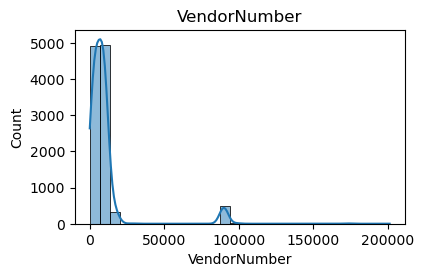

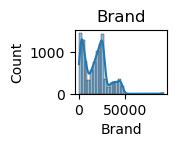

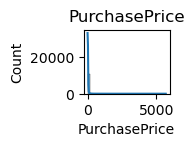

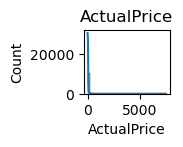

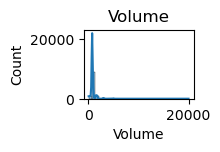

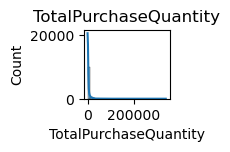

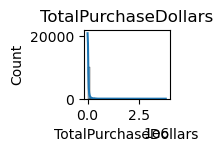

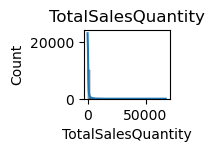

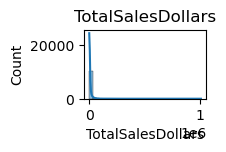

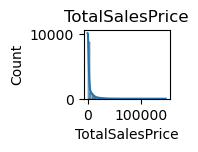

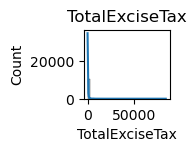

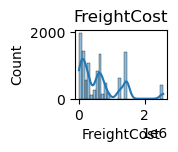

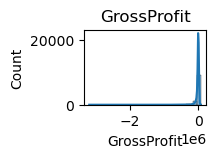

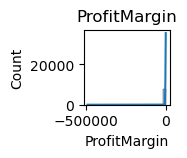

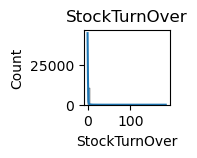

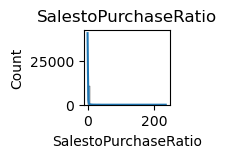

In [131]:
#distrbution plot for numerical column 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats  as stats
from scipy.stats import ttest_ind
import numpy as np
import warnings
warnings.filterwarnings('ignore')

numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust or grid lines needed 
    sns.histplot(df[col], kde = True, bins= 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    

In [ ]:
#using box plot we find outliers 

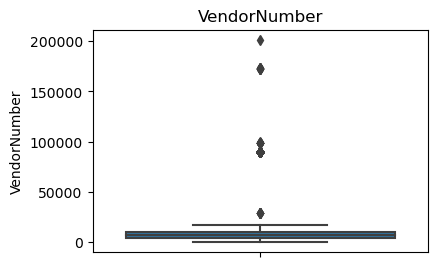

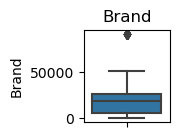

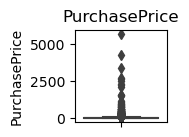

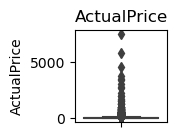

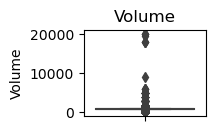

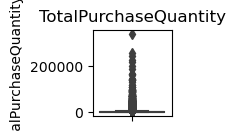

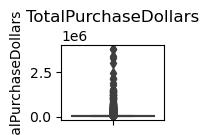

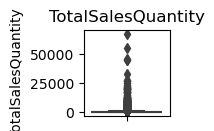

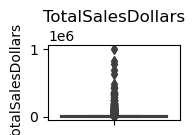

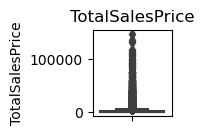

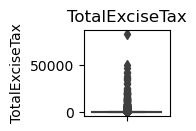

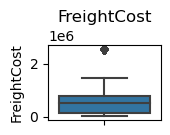

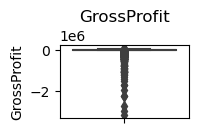

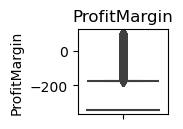

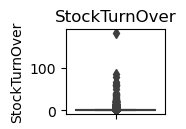

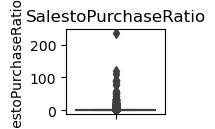

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats  as stats
from scipy.stats import ttest_ind
import numpy as np
import warnings
warnings.filterwarnings('ignore')

numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust or grid lines needed 
    sns.boxplot(y = df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [28]:
#insights

Summary Statistics Insights

Negative & Zero Values:
  • Gross Profit: Minimum value is -52002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
  • Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
  • Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
  • Purchase & Actual Prices: The max values (5681.81 & 7499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
  • Freight Cost: Huge variation, from 0.09 to 257032.07, suggests logistics inefficiencies or bulk shipments.
  • Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that

In [29]:
#now filtering the by removing outliers 

df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)


In [30]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,11349.0,257448.51,71914.25,20851.33,1238809.7,71766.06,27.875889,0.980984,1.386499
1,3960,DIAGEO NORTH AMERICA INC,2492,Crown Royal Hand Slct Barrel,41.66,54.99,750.0,797,33203.02,628.0,34533.72,4564.17,494.59,2570320.7,1330.70,3.853335,0.787955,1.040078
2,8112,MOET HENNESSY USA INC,1023,Hennessy VSOP Cognac + 50mL,35.93,45.99,750.0,760,27306.80,675.0,35600.25,7404.59,531.64,483472.6,8293.45,23.296044,0.888158,1.303714
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250,24832.50,199.0,29848.01,1349.91,22.35,287205.2,5015.51,16.803499,0.796000,1.201974
4,10754,PERFECTA WINES,24768,Vinsacro Rioja,10.95,15.99,750.0,2243,24560.85,1541.0,24640.59,10009.74,172.12,287205.2,79.74,0.323612,0.687026,1.003247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,2570320.7,21.04,88.107203,6.000000,8.408451
1200,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,271004.1,3.33,55.778894,1.500000,2.261364
1201,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,502936.2,60.38,96.269133,21.333333,26.803419
1202,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,2570320.7,10.47,87.688442,6.000000,8.122449


In [31]:
#now again plot histplot to see profit margin data is from zero to hundred 

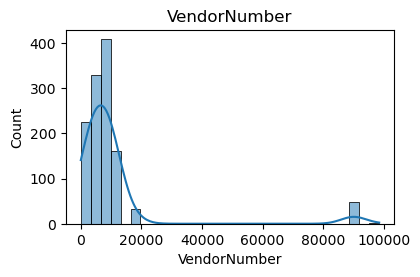

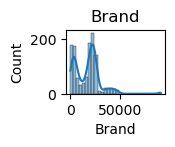

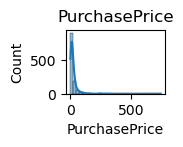

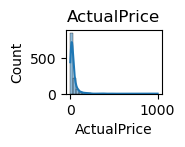

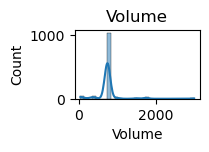

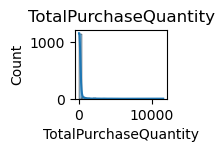

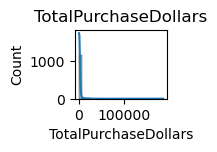

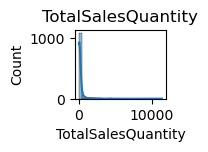

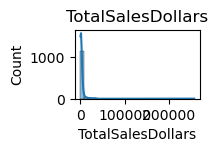

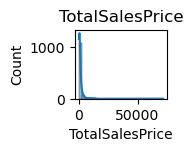

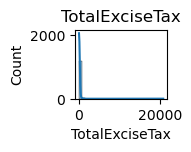

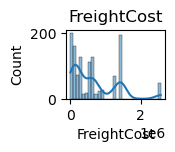

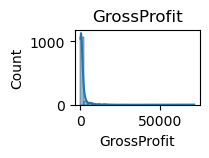

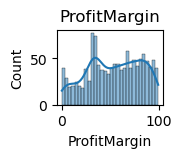

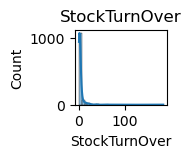

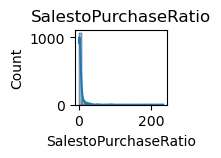

In [32]:
numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust or grid lines needed 
    sns.histplot(df[col], kde = True, bins= 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [33]:
#to see how much data is prenet for vendors and product specific ~  plot count plot 

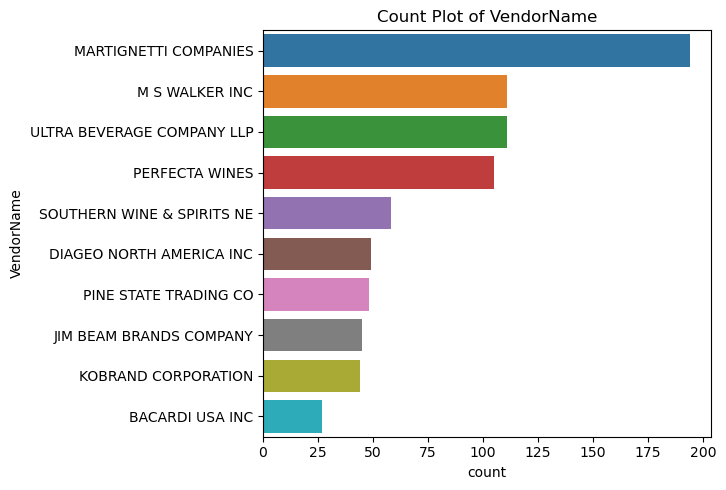

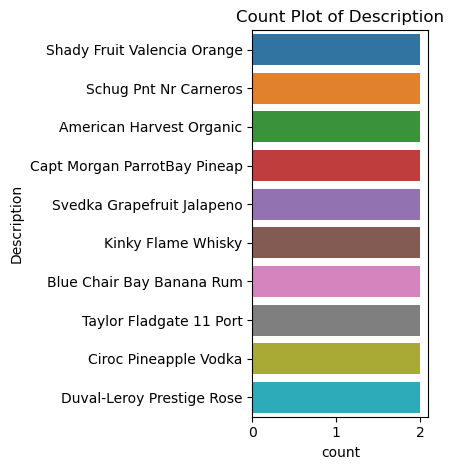

In [34]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()


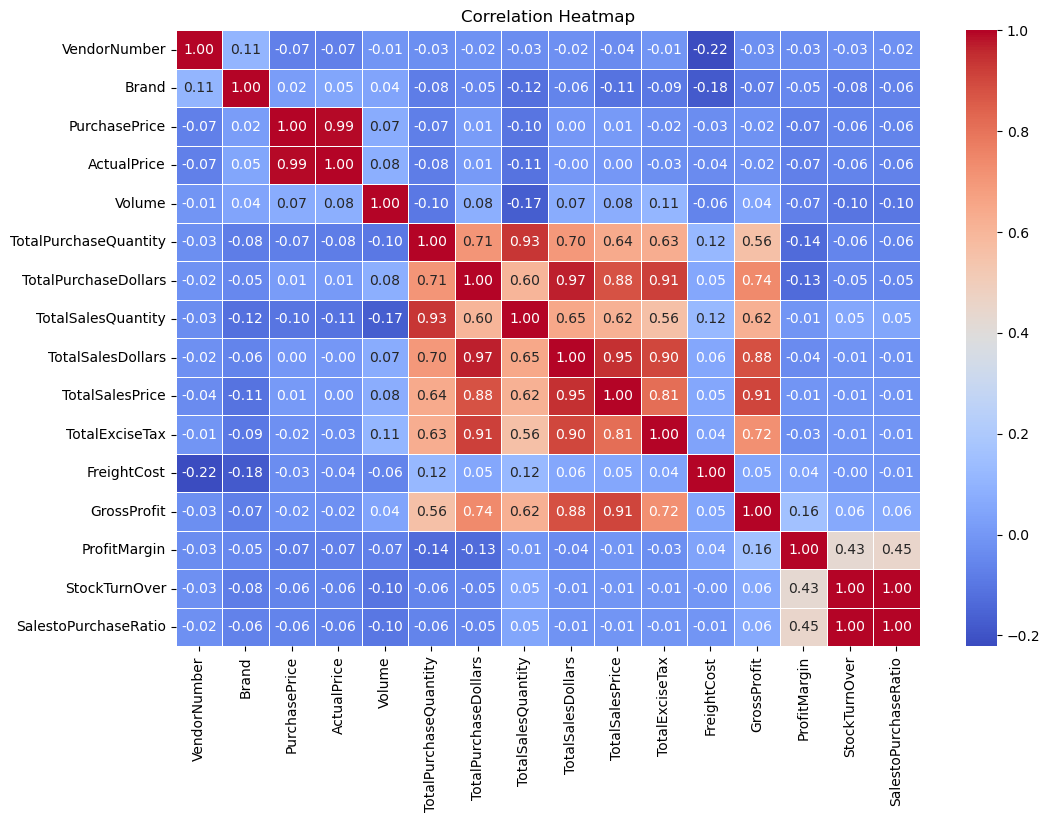

In [36]:
#to find relation between them 

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [37]:
#correlation insights 

Correlation Heatmap Insights

1. Pricing and Profitability
   - PurchasePrice and ActualPrice show very strong positive correlation (0.99)
     → Selling price is almost perfectly determined by purchase cost indicating consistent markup strategy
   - GrossProfit strongly correlates with TotalSalesDollars (0.88) and TotalPurchaseDollars (0.74)
     → As revenue and purchase costs rise, absolute profit also rises
   - ProfitMargin has weak positive correlation with GrossProfit (0.16) and slight negative with TotalSalesPrice (-0.14)
     → Higher sales do not necessarily increase profit percentage and may even reduce it due to discounts or competition

2. Inventory and Sales
   - TotalPurchaseQuantity and TotalSalesQuantity show very strong positive correlation (0.93)
     → Confirms efficient inventory turnover
   - StockTurnOver has moderate positive correlation with ProfitMargin (0.43) but weak with GrossProfit (0.16)
     → Faster selling products often have better margins but not nec

In [41]:
#data anlysis

Data Analyis & Business Probem


In [42]:
#identify brands that needs promotional or pricing adjustments whihc exhibits lower sales performance but higher profit margins

In [44]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars': 'sum', 'ProfitMargin': 'mean'}).reset_index()

In [47]:
low_sales_threshold = high_margin_thresholde['TotalSalesDollars'].quantile(0.15)
high_margin_threshold  =  brand_performance['ProfitMargin'].quantile(0.85)

In [48]:
low_sales_threshold

167.80800000000002

In [49]:
high_margin_threshold

85.30341507096242

In [52]:
#filtering the brands with low sales with high profit margins 
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold ) &
                                 (brand_performance['ProfitMargin'] >= high_margin_threshold )]
print('Brands with low sales with high profit margins:')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales with high profit margins:


,Description,TotalSalesDollars,ProfitMargin
1080,The Club Strawbry Margarita,11.94,87.688442
382,Crown Royal Apple,23.88,88.107203
905,Riunite Sweet White,41.93,90.221798
1115,Tracia Syrah,44.94,88.495772
428,Dr McGillicuddy's Apple Pie,62.72,96.269133
872,Promesses de France CdRhone,71.91,92.337644
46,Aresti Pnt Nr Curico Vly,74.85,95.617902
396,DeKuyper Mixed Berry Medley,76.93,89.652931
1093,Three Olives Grape Vodka,84.15,99.156269
786,Nyers Vyds Sage Canyon Red,113.94,88.502721


In [56]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] <10000]

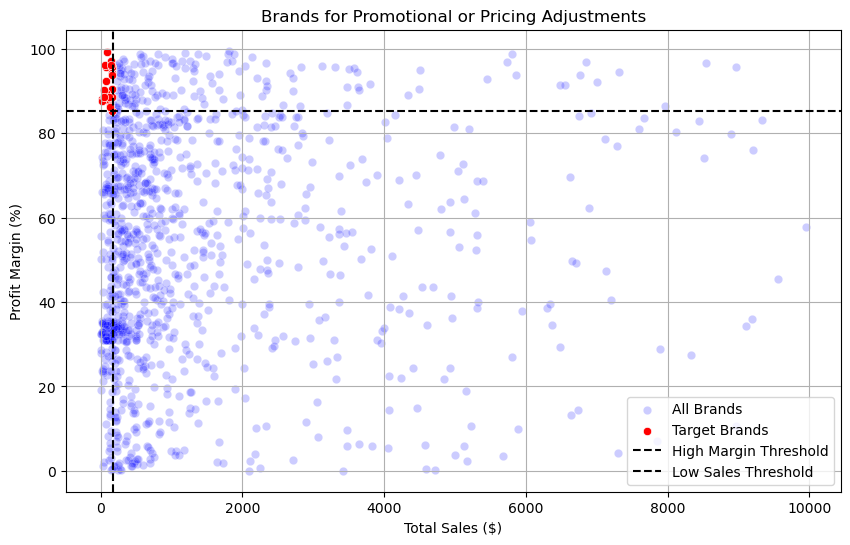

In [57]:
#lets create scatter plot for this 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()




In [58]:
#which vendors and brand high sales performance 
top_Vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_Brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)


In [59]:
top_Vendors

VendorName
MARTIGNETTI COMPANIES         421321.04
JIM BEAM BRANDS COMPANY       349596.30
ULTRA BEVERAGE COMPANY LLP    326206.83
M S WALKER INC                240639.29
PERFECTA WINES                155492.86
DIAGEO NORTH AMERICA INC      145795.51
BACARDI USA INC               112708.73
STATE WINE & SPIRITS           91803.44
SOUTHERN WINE & SPIRITS NE     91055.79
KOBRAND CORPORATION            70087.91
Name: TotalSalesDollars, dtype: float64

In [60]:
top_Brands

Description
Jim Beam Traveler               257448.51
Hennessy VSOP Cognac + 50mL      35600.25
DiSaronna Amaretto Sour VAP      35211.91
Crown Royal Hand Slct Barrel     34533.72
Bacardi Twin Pack 2/750mls       34182.90
Paul Dolan 12 Cab Svgn           33472.67
Liberty School Pnt Nr CC         33398.18
Schug Pnt Nr Carneros            33390.63
Napa Highlands Meritage          31918.05
Landmark Overlook Chard          30745.70
Name: TotalSalesDollars, dtype: float64

In [67]:
def format_dollar(value):
    if value >= 1_000_000:
        return f"{value/1_000_000: .2f}M"
    elif value >= 1_000:
        return f"{value/1_000: .2f}K"
    else:
        return str(value)

In [68]:
top_Brands.apply(lambda x:format_dollar(x))

Description
Jim Beam Traveler                257.45K
Hennessy VSOP Cognac + 50mL       35.60K
DiSaronna Amaretto Sour VAP       35.21K
Crown Royal Hand Slct Barrel      34.53K
Bacardi Twin Pack 2/750mls        34.18K
Paul Dolan 12 Cab Svgn            33.47K
Liberty School Pnt Nr CC          33.40K
Schug Pnt Nr Carneros             33.39K
Napa Highlands Meritage           31.92K
Landmark Overlook Chard           30.75K
Name: TotalSalesDollars, dtype: object

In [69]:
#plotting bar plot for this 

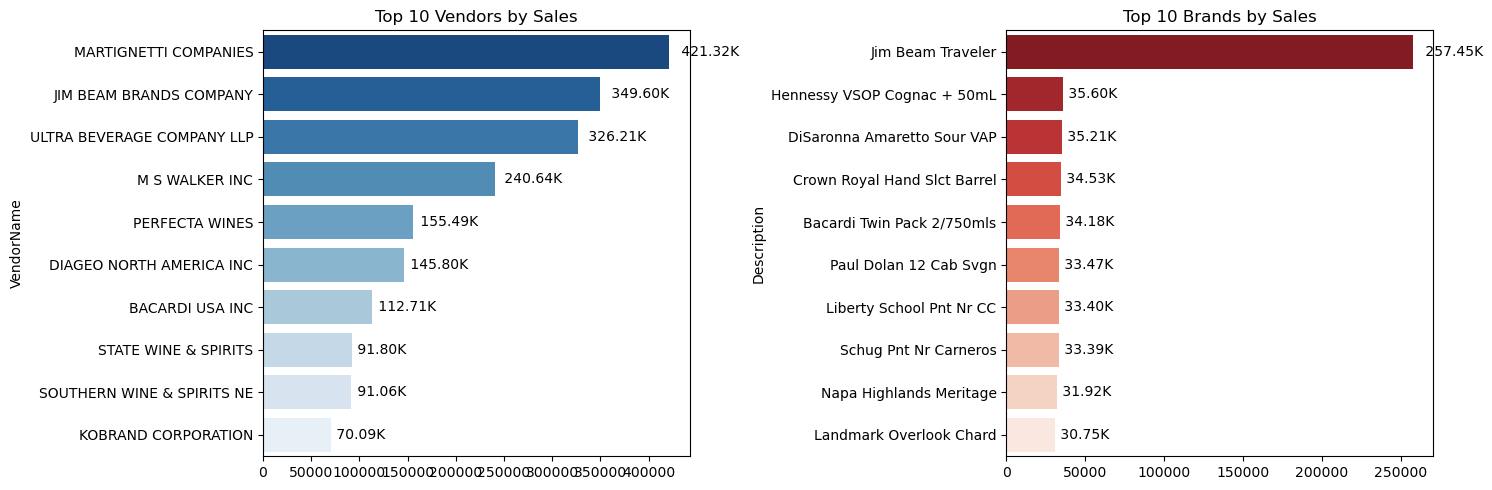

In [72]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_Vendors.index, x=top_Vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_Brands.index.astype(str), x=top_Brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [73]:
#vendors to conritbut most to the total purchase dollars

In [78]:
vendor_performance = df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum', 
                                                   'GrossProfit': 'sum' , 
                                                   'TotalSalesDollars':'sum'}).reset_index()

In [84]:
vendor_performance['PurchaseContributions%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()       

In [87]:
vendor_performance = round( vendor_performance.sort_values('PurchaseContributions%', ascending = False),2)

In [89]:
#display top 10 vendors 

top_vendors =  vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollar)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContributions,PurchaseContributions%
26,JIM BEAM BRANDS COMPANY,225.58K,124.02K,349.60K,0.16,0.16
35,MARTIGNETTI COMPANIES,197.71K,223.61K,421.32K,0.14,0.14
71,ULTRA BEVERAGE COMPANY LLP,141.12K,185.08K,326.21K,0.10,0.10
44,PERFECTA WINES,103.00K,52.49K,155.49K,0.07,0.07
32,M S WALKER INC,101.79K,138.85K,240.64K,0.07,0.07
14,DIAGEO NORTH AMERICA INC,98.22K,47.58K,145.80K,0.07,0.07
39,MOET HENNESSY USA INC,40.48K,22.12K,62.59K,0.03,0.03
60,SOUTHERN WINE & SPIRITS NE,38.79K,52.27K,91.06K,0.03,0.03
62,STATE WINE & SPIRITS,35.10K,56.70K,91.80K,0.03,0.03
2,BACARDI USA INC,42.60K,70.11K,112.71K,0.03,0.03


In [92]:
vendor_performance.shape

(79, 6)

In [94]:
top_vendors['PurchaseContributions%'].sum()

0.7300000000000002

In [95]:
#means 10 vendors out of 79 contirbuting to more than 50 %

In [106]:
top_vendors['Cumulative_Contributions%'] =  top_vendors['PurchaseContributions%'].cumsum()*100
top_vendors = top_vendors.drop('Cumalative_Contributions%', axis=1)  
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContributions,PurchaseContributions%,Cumulative_Contributions%
26,JIM BEAM BRANDS COMPANY,225.58K,124.02K,349.60K,0.16,0.16,16.0
35,MARTIGNETTI COMPANIES,197.71K,223.61K,421.32K,0.14,0.14,30.0
71,ULTRA BEVERAGE COMPANY LLP,141.12K,185.08K,326.21K,0.10,0.10,40.0
44,PERFECTA WINES,103.00K,52.49K,155.49K,0.07,0.07,47.0
32,M S WALKER INC,101.79K,138.85K,240.64K,0.07,0.07,54.0
14,DIAGEO NORTH AMERICA INC,98.22K,47.58K,145.80K,0.07,0.07,61.0
39,MOET HENNESSY USA INC,40.48K,22.12K,62.59K,0.03,0.03,64.0
60,SOUTHERN WINE & SPIRITS NE,38.79K,52.27K,91.06K,0.03,0.03,67.0
62,STATE WINE & SPIRITS,35.10K,56.70K,91.80K,0.03,0.03,70.0
2,BACARDI USA INC,42.60K,70.11K,112.71K,0.03,0.03,73.0


In [97]:
#plot fr this 

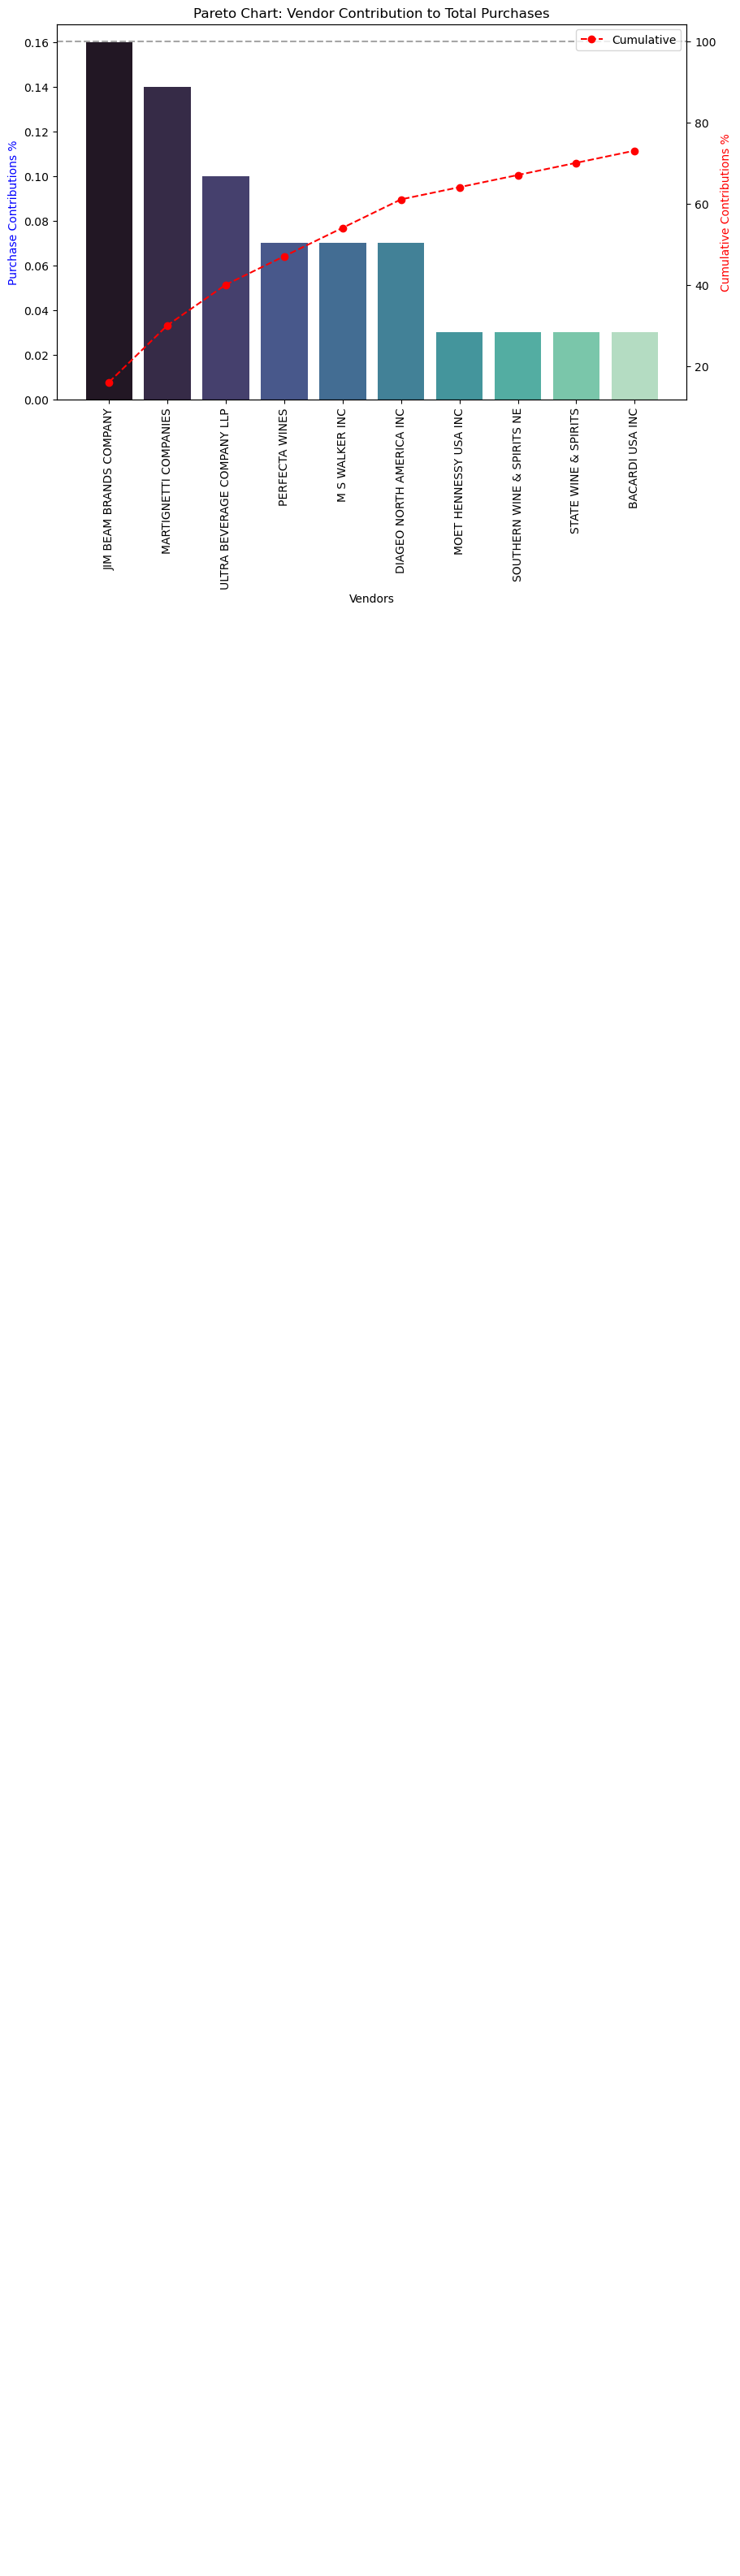

In [107]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContributions%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContributions%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contributions%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contributions %', color='blue')
ax2.set_ylabel('Cumulative Contributions %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


In [108]:
#how much  of the procurement dependent on vendors 

In [111]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['PurchaseContributions%'].sum(),2)*100} %" )

Total purchase contribution of top 10 vendors is 73.0 %


In [112]:
#using donate chart for conrtibuions 

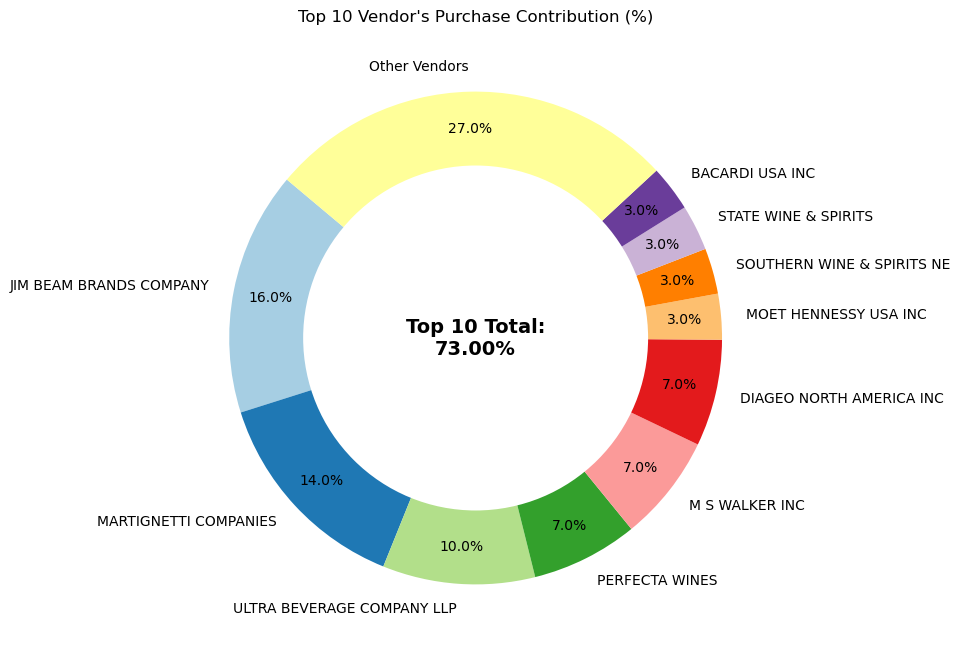

In [116]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list((top_vendors['PurchaseContributions%'] * 100).values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


In [117]:
#does pruchasing in bulk reduce unit price and what is optimal purchase volume for cost savings 

In [119]:
df['UnitPurchasePrice']  = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df['UnitPurchasePrice'].head()

0    16.05
1    41.66
2    35.93
3    99.33
4    10.95
Name: UnitPurchasePrice, dtype: float64

In [121]:
#savings into three categories
df['OrderSize']  = pd.qcut(df['TotalPurchaseQuantity'] , q = 3,  labels=['Small','Medium','Large'])

In [124]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,11569
1,Large,797
2,Large,760
3,Large,250
4,Large,2243
...,...,...
1199,Small,2
1200,Small,2
1201,Small,6
1202,Small,1


In [125]:
df.groupby('OrderSize')[['TotalPurchaseQuantity']].mean()

,TotalPurchaseQuantity
OrderSize,
Small,3.956627
Medium,18.856423
Large,362.211735


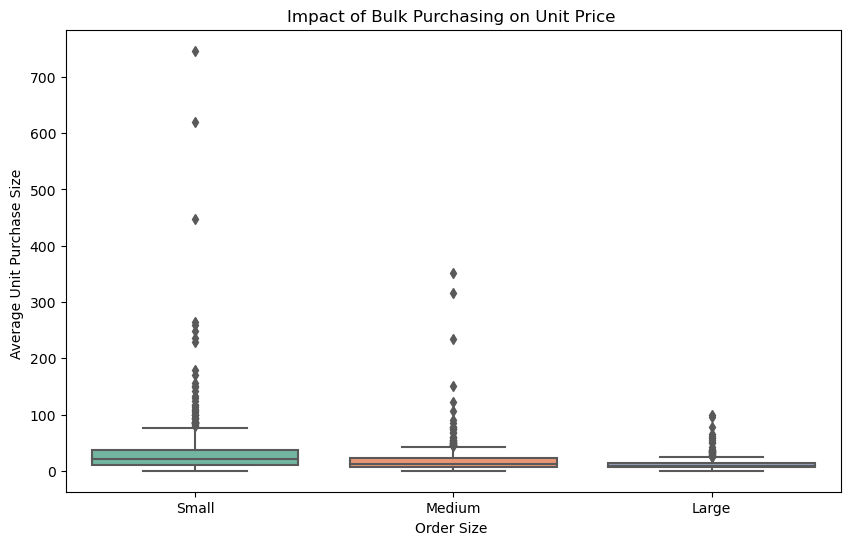

In [129]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x = "OrderSize" , y= "UnitPurchasePrice", palette= "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price ")
plt.xlabel("Order Size ")
plt.ylabel("Average Unit Purchase Size ")
plt.show()

In [130]:
#this shows

In [131]:
print(" vendors purchasing in large have lower average unit price meaning they have higher margins if they use inventory efficienlty") 

 vendors purchasing in large have lower average unit price meaning they have higher margins if they use inventory efficienlty


In [132]:
print("price difference between small and large is approx 72% recudtion in cost ")

price difference between small and large is approx 72% recudtion in cost 


In [133]:
print("this suggest bulk purchasing strategies encourage vendors to purchase in large volumes leading to their higher overall sales despite lower per unit value ")

this suggest bulk purchasing strategies encourage vendors to purchase in large volumes leading to their higher overall sales despite lower per unit value 


In [134]:
#iidentify venors with low inventory turnover indicating excess stock and slow moving products

In [135]:
#firsttly we have to analysis on sto < 1 only other are moving good 

In [137]:
df[df['StockTurnOver']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,11349.0,257448.51,71914.25,20851.33,1238809.7,71766.06,27.875889,0.980984,1.386499,16.05,Large
1,3960,DIAGEO NORTH AMERICA INC,2492,Crown Royal Hand Slct Barrel,41.66,54.99,750.0,797,33203.02,628.0,34533.72,4564.17,494.59,2570320.7,1330.70,3.853335,0.787955,1.040078,41.66,Large
2,8112,MOET HENNESSY USA INC,1023,Hennessy VSOP Cognac + 50mL,35.93,45.99,750.0,760,27306.80,675.0,35600.25,7404.59,531.64,483472.6,8293.45,23.296044,0.888158,1.303714,35.93,Large
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250,24832.50,199.0,29848.01,1349.91,22.35,287205.2,5015.51,16.803499,0.796000,1.201974,99.33,Large
4,10754,PERFECTA WINES,24768,Vinsacro Rioja,10.95,15.99,750.0,2243,24560.85,1541.0,24640.59,10009.74,172.12,287205.2,79.74,0.323612,0.687026,1.003247,10.95,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,516,BANFI PRODUCTS CORP,22195,Placido Pinot Grigio Venezi,5.33,7.99,750.0,12,63.96,8.0,71.92,71.92,0.88,85104.1,7.96,11.067853,0.666667,1.124453,5.33,Medium
1019,10754,PERFECTA WINES,20178,Robert Sinskey Pnt Bl,16.33,24.99,375.0,3,48.99,2.0,49.98,49.98,0.12,287205.2,0.99,1.980792,0.666667,1.020208,16.33,Small
1040,1392,CONSTELLATION BRANDS INC,8923,Taylor Lake Country Wh,5.26,7.99,3000.0,8,42.08,7.0,55.93,23.97,3.15,795289.9,13.85,24.763097,0.875000,1.329135,5.26,Small
1088,11567,CAMPARI AMERICA,3371,Skyy Infusions Georgia Peach,0.71,0.99,50.0,40,28.40,29.0,28.71,15.84,1.48,209648.1,0.31,1.079763,0.725000,1.010915,0.71,Large


In [139]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver' , ascending = True).head(10)

,StockTurnOver
VendorName,
E & J GALLO WINERY,0.633013
WINE GROUP INC,0.666667
SURVILLE ENTERPRISES CORP,0.666667
LAIRD & CO,0.666667
R.P.IMPORTS INC,0.666667
THE IMPORTED GRAPE LLC,0.685714
WESTERN SPIRITS BEVERAGE CO,0.689522
SEA BREEZE CELLARS LLC,0.694444
Circa Wines,0.696078


In [140]:
#from this we can get which vendors is givng us profit or which is not 

In [141]:
#How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [144]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', (df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: -560450.18


In [146]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollar)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
70,TRINCHERO FAMILY ESTATES,2.10K
36,MCCORMICK DISTILLING CO,575.85
65,SURVILLE ENTERPRISES CORP,211.01999999999998
11,Circa Wines,201.19
57,SHAW ROSS INT L IMP LTD,66.03
29,LAIRD & CO,63.12
56,SEA BREEZE CELLARS LLC,62.989999999999995
44,PERFECTA WINES,62.54000000000005
30,LATITUDE BEVERAGE COMPANY,55.83
42,OLE SMOKY DISTILLERY LLC,40.68


In [ ]:
#What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [148]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [149]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [150]:
top_vendors

0       27.875889
1        3.853335
2       23.296044
3       16.803499
4        0.323612
          ...    
867     94.977305
924     96.020538
930     96.631462
964     98.891176
1049    98.155620
Name: ProfitMargin, Length: 301, dtype: float64

In [152]:
low_vendors

568      0.486040
585      1.743841
587      1.405405
594      0.150150
612      8.064715
          ...    
1199    88.107203
1200    55.778894
1201    96.269133
1202    87.688442
1203    99.156269
Name: ProfitMargin, Length: 302, dtype: float64

In [153]:
#confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (51.47, 57.97), Mean: 54.72
Low Vendors 95% CI: (45.12, 51.11), Mean: 48.12


<function matplotlib.pyplot.show(close=None, block=None)>

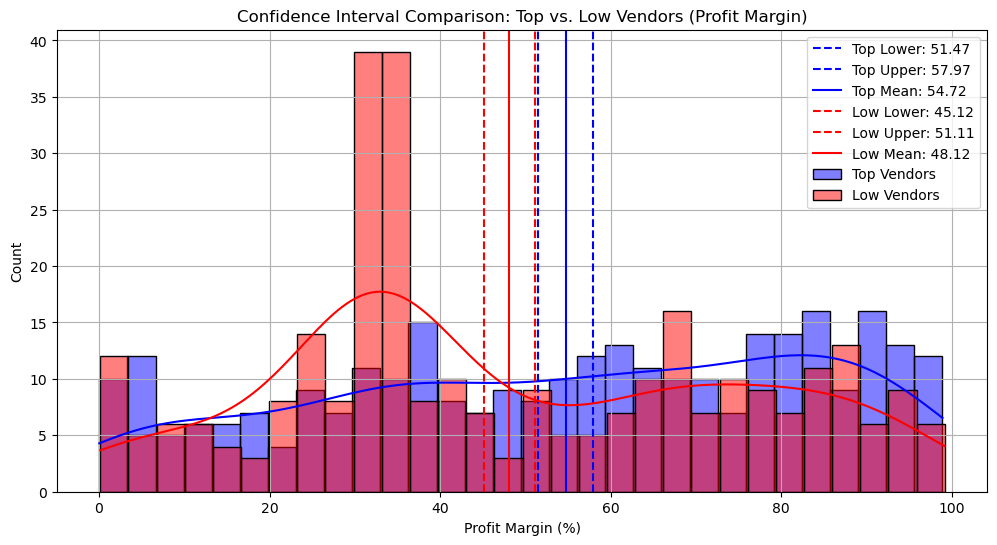

In [154]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.legend()
plt.grid(True)
plt.show

In [157]:
print(" The 95% confidence interval for top-performing vendors (51.47% to 57.97%) is significantly higher than that of low-performing vendors (45.12% to 51.11%). The two intervals do not overlap, indicating a statistically meaningful difference in profitability.This suggests that, in your dataset, vendors with higher sales volumes also achieve considerably higher profit margins.") 
      
print("This could be attributed to economies of scale, more favorable purchasing prices from suppliers, or more efficient operational models.")

print( "For High-Performing Vendors: Given their strong performance in both sales and margins, the focus should be on sustaining this advantage. They could explore strategies like loyalty programs, premium product offerings, or further cost optimizations to solidify their market position.")

print( "For Low-Performing Vendors: The key challenge is that both their sales volume and profit margins are lower. They need to implement strategies aimed at boosting profitability, such as renegotiating costs with suppliers, refining their pricing strategies, or analyzing their product mix to eliminate low-margin items ")

 The 95% confidence interval for top-performing vendors (51.47% to 57.97%) is significantly higher than that of low-performing vendors (45.12% to 51.11%). The two intervals do not overlap, indicating a statistically meaningful difference in profitability.This suggests that, in your dataset, vendors with higher sales volumes also achieve considerably higher profit margins.
This could be attributed to economies of scale, more favorable purchasing prices from suppliers, or more efficient operational models.
For High-Performing Vendors: Given their strong performance in both sales and margins, the focus should be on sustaining this advantage. They could explore strategies like loyalty programs, premium product offerings, or further cost optimizations to solidify their market position.
For Low-Performing Vendors: The key challenge is that both their sales volume and profit margins are lower. They need to implement strategies aimed at boosting profitability, such as renegotiating costs with 

In [158]:
#is there significant difference in top performing and high peroforming 

In [159]:
#using null hypothesis

In [160]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject He: No significant difference in profit margins.")


T-Statistic: 2.9407, P-Value: 0.0034
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.


In [161]:
#p value is very low suggesting there is diference betwene them 

In [162]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalestoPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize', 'UnsoldInventoryValue'],
      dtype='object')

In [163]:
vendor_performance.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContributions', 'PurchaseContributions%'],
      dtype='object')

In [164]:
df.to_csv(r"C:\\Users\\JATIN KUMAR\\Downloads\\python analysis\\Vendor performance analysis\\data\\data\\Vendor_sales_summary.csv", index=False)

In [165]:
vendor_performance.to_csv(r"C:\\Users\\JATIN KUMAR\\Downloads\\python analysis\\Vendor performance analysis\\data\\data\\Vendor_Performance.csv", index=False)

In [166]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [167]:
vendor_performance['Top Vendor'] = top_vendors

In [169]:
vendor_performance['Top Vendor']

26    15.829543
35    68.046783
71     6.279310
44     2.379354
32    50.382711
        ...    
13    25.607432
63    14.973219
61    38.616890
3     16.803499
16    63.346410
Name: Top Vendor, Length: 79, dtype: float64

In [170]:
brand_performance.columns

Index(['Description', 'TotalSalesDollars', 'ProfitMargin'], dtype='object')